# Projeto 23: Fazendo Transfer Learning 

## Etapa 1: Baixando e descompactando as imagens

In [1]:
!wget http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar

--2025-03-10 10:10:50--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolvendo groups.csail.mit.edu (groups.csail.mit.edu)... 128.52.131.233
Conectando-se a groups.csail.mit.edu (groups.csail.mit.edu)|128.52.131.233|:80... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: https://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar [redirecionando]
--2025-03-10 10:10:51--  https://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Conectando-se a groups.csail.mit.edu (groups.csail.mit.edu)|128.52.131.233|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 2592010240 (2,4G) [application/x-tar]
Salvando em: ‘indoorCVPR_09.tar’

indoorCVPR_09.tar   100%[===================>]   2,41G  10,6MB/s    em 8m 47s  

2025-03-10 10:19:38 (4,69 MB/s) - ‘indoorCVPR_09.tar’ salvo [2592010240/2592010240]



In [2]:
!tar -xvf indoorCVPR_09.tar

Images/
Images/airport_inside/
Images/airport_inside/airport_inside_0001.jpg
Images/airport_inside/airport_inside_0002.jpg
Images/airport_inside/airport_inside_0003.jpg
Images/airport_inside/airport_inside_0004.jpg
Images/airport_inside/airport_inside_0005.jpg
Images/airport_inside/airport_inside_0006.jpg
Images/airport_inside/airport_inside_0048.jpg
Images/airport_inside/airport_inside_0007.jpg
Images/airport_inside/airport_inside_0008.jpg
Images/airport_inside/airport_inside_0009.jpg
Images/airport_inside/airport_inside_0010.jpg
Images/airport_inside/airport_inside_0011.jpg
Images/airport_inside/airport_inside_0012.jpg
Images/airport_inside/airport_inside_0013.jpg
Images/airport_inside/airport_inside_0047.jpg
Images/airport_inside/airport_inside_0014.jpg
Images/airport_inside/airport_inside_0015.jpg
Images/airport_inside/airport_inside_0049.jpg
Images/airport_inside/airport_inside_0016.jpg
Images/airport_inside/airport_inside_0017.jpg
Images/airport_inside/airport_inside_0018.jpg
Ima

## Etapa 2: Preparação das pastas

In [6]:
import os

num_files_per_folder = [len(files) for root, dirs, files in os.walk("Images") if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk("Images") if len(dirs) > 0][0]

num_files_per_folder[:5], folders[:5]

([103, 734, 125, 276, 107],
 ['concert_hall', 'kitchen', 'laboratorywet', 'laundromat', 'library'])

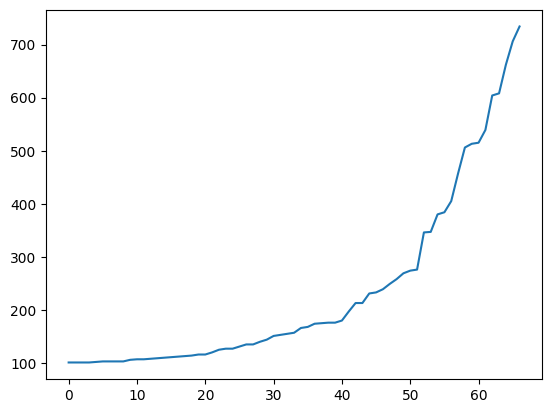

In [5]:
import matplotlib.pyplot as plt

plt.plot(sorted(num_files_per_folder))
plt.show()

In [7]:
import numpy as np 

sum(np.array(num_files_per_folder) > 600)

np.int64(5)

In [8]:
mask = np.array(num_files_per_folder) > 600
folders_to_keep = list(np.array(folders)[mask])
folders_to_keep

[np.str_('kitchen'),
 np.str_('livingroom'),
 np.str_('airport_inside'),
 np.str_('bar'),
 np.str_('bedroom')]

In [9]:
import shutil

[shutil.rmtree(f"Images/{folder}") for folder in folders if folder not in folders_to_keep]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
num_files_per_folder = [len(files) for root, dirs, files in os.walk("Images") if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk("Images") if len(dirs) > 0][0]
filenames = [os.listdir(f"Images/{folder}") for folder in folders]

num_files_per_folder, folders, filenames

([734, 706, 608, 604, 662],
 ['kitchen', 'livingroom', 'airport_inside', 'bar', 'bedroom'],
 [['int385.jpg',
   'room3.jpg',
   'room332.jpg',
   'room336.jpg',
   'room337.jpg',
   'room338.jpg',
   'room340.jpg',
   'room341.jpg',
   'room343.jpg',
   'room362.jpg',
   'room364.jpg',
   'room365.jpg',
   'room40.jpg',
   'room404.jpg',
   'room41.jpg',
   'room410.jpg',
   'room427.jpg',
   'room428.jpg',
   'room429.jpg',
   'room430.jpg',
   'room461.jpg',
   'room475.jpg',
   'room50.jpg',
   'room515.jpg',
   'room516.jpg',
   'room517.jpg',
   'room7.jpg',
   'roomscan16.jpg',
   'roomscan39.jpg',
   'roomscan40.jpg',
   's4030012.jpg',
   'smallsp021.jpg',
   'smallsp025.jpg',
   'SoftffL.T.jpg',
   'StrongddLT.jpg',
   'StrongmiL.T.jpg',
   'VA-02-04-7657-02_l.jpg',
   'VA-02-05-1546-05_l.jpg',
   '000106949b.jpg',
   '003.jpg',
   '007330543a.jpg',
   '100_1238.jpg',
   '100_2855.jpg',
   '1208_hall_entrada_010.jpg',
   '2326_1.jpg',
   '2335_1.jpg',
   'aa014484.jpg',
   'aa

In [11]:
np.random.seed(42)
files_to_test = [sorted(np.random.choice(files, round(num_files * 0.2 ), replace=False)) for files, num_files in zip(filenames, num_files_per_folder)]
files_to_test

[[np.str_('003.jpg'),
  np.str_('2326_1.jpg'),
  np.str_('D55.jpg'),
  np.str_('ICHAIR.jpg'),
  np.str_('IMG_0087.jpg'),
  np.str_('IMG_9003.jpg'),
  np.str_('IN111.jpg'),
  np.str_('ISTOOL.JPG'),
  np.str_('N190018.jpg'),
  np.str_('N190040.jpg'),
  np.str_('N364007.jpg'),
  np.str_('N364021.jpg'),
  np.str_('N364026.jpg'),
  np.str_('N364027.jpg'),
  np.str_('N364028.jpg'),
  np.str_('N364030.jpg'),
  np.str_('N364031.jpg'),
  np.str_('N364032.jpg'),
  np.str_('N364037.jpg'),
  np.str_('N364042.jpg'),
  np.str_('N364052.jpg'),
  np.str_('N364055.jpg'),
  np.str_('N364062.jpg'),
  np.str_('N364066.jpg'),
  np.str_('N364076.jpg'),
  np.str_('N364081.jpg'),
  np.str_('N364086.jpg'),
  np.str_('N364091.jpg'),
  np.str_('N364094.jpg'),
  np.str_('N364099.jpg'),
  np.str_('N55.jpg'),
  np.str_('N64.jpg'),
  np.str_('NeutrcL.T.jpg'),
  np.str_('OR-99-3-9374-34_l.jpg'),
  np.str_('SoftffL.T.jpg'),
  np.str_('apto_025.jpg'),
  np.str_('cdMC1121.jpg'),
  np.str_('cdMC1129.jpg'),
  np.str_('cdM

In [14]:
os.mkdir('Images/test')
[os.mkdir(f"Images/test/{folder}") for folder in folders];
[shutil.move(f"Images/{folder}/{file}", f"Images/test/{folder}/{file}") for folder, files in zip(folders, files_to_test) for file in files];

FileExistsError: [Errno 17] File exists: 'Images/test'

In [15]:
os.mkdir('Images/train')
[os.mkdir(f"Images/train/{folder}") for folder in folders];
[shutil.move(f"Images/{folder}/{file}", f"Images/train/{folder}/{file}") for folder in folders for file in os.listdir(f"Images/{folder}")];

In [16]:
os.rename('Images', 'dataset')

## Etapa 3: Inspeção das imagens

In [37]:
filenames = [os.listdir(f"Bases/dataset/train/{folder}") for folder in folders]
files_to_visualize = [np.random.choice(files, 5, replace=False) for files in filenames]
files_to_visualize

[array(['room410.jpg', 'N364089.jpg', 'N364087.jpg', 'N364084.jpg',
        'cdMC1225.jpg'], dtype='<U35'),
 array(['t_livingroom003_md.jpg', 'roomscan30.jpg', 'int883.jpg',
        'int886.jpg', 'room131.jpg'], dtype='<U33'),
 array(['airport_inside_0381.jpg', 'airport_inside_0073.jpg',
        'airport_inside_0523.jpg', 'airport_inside_0435.jpg',
        'airport_inside_0275.jpg'], dtype='<U23'),
 array(['bar_0305.jpg', 'bar_0530.jpg', 'bar_0318.jpg', 'bar_0331.jpg',
        'bar_0014.jpg'], dtype='<U12'),
 array(['IMG_2830.jpg', 'int188.jpg', 'int191.jpg', 'int139.jpg',
        'indoor_0339.jpg'], dtype='<U33')]

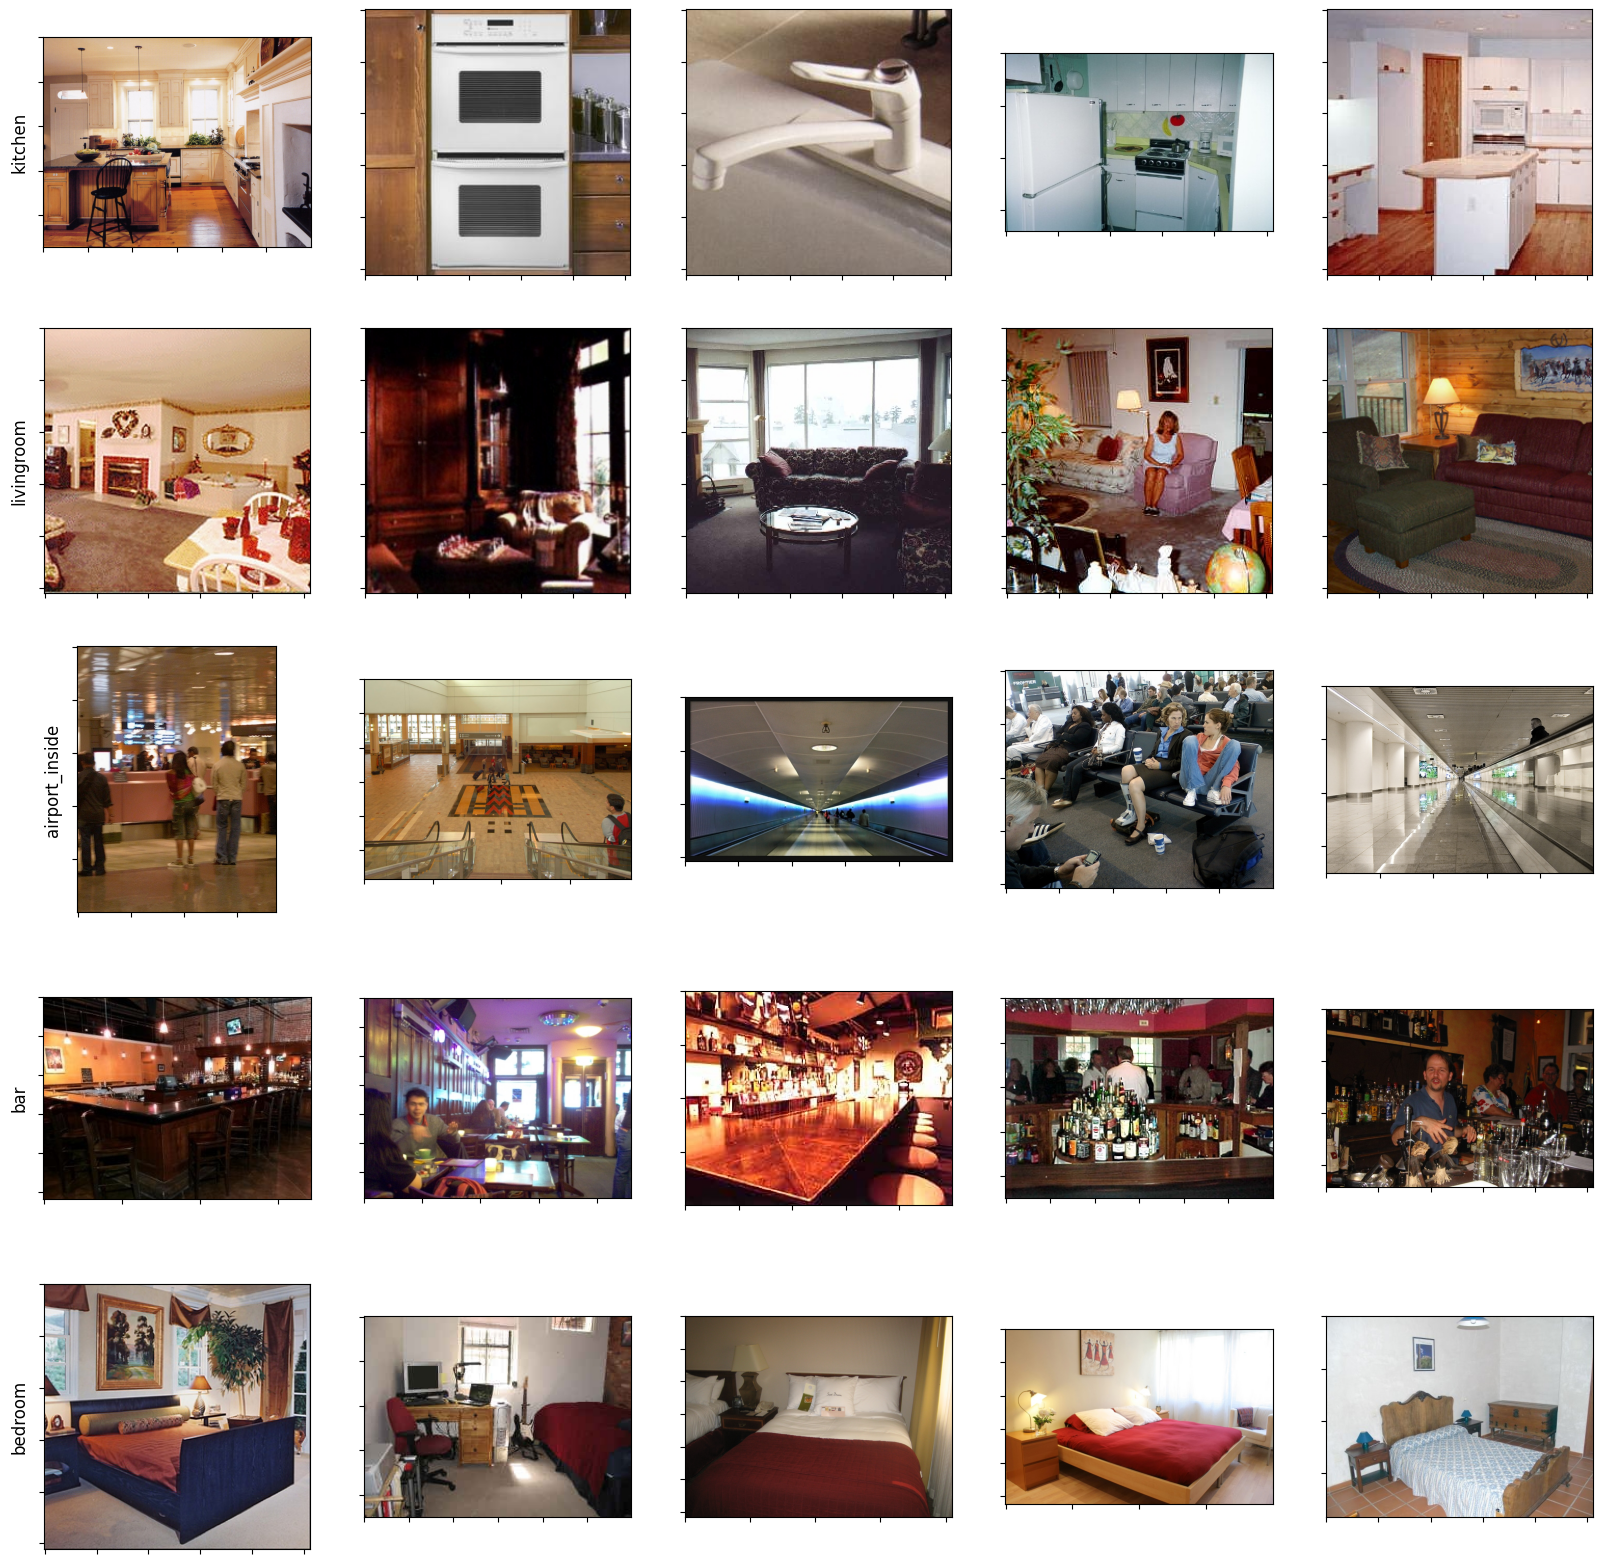

In [20]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for row in range(5):
    category = folders[row]
    ax_row = ax[row]
    for col in range(5):
        img = plt.imread(f"Bases/dataset/train/{category}/{files_to_visualize[row][col]}")
        ax_column = ax_row[col]
        ax_column.imshow(img)
        
        if col == 0:
            ax_column.set_ylabel(category, size = 'large')
        
        ax_column.set_xticklabels([])
        ax_column.set_yticklabels([])

## Etapa 4: Preparando os datasets para uso no Pytorch

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.functional import F
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from datetime import datetime

In [23]:
torch.manual_seed(124)

In [24]:
data_dir_train = 'Bases/dataset/train'
data_dir_test = 'Bases/dataset/test'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [25]:
train_dataset = datasets.ImageFolder(data_dir_train, transform=transform)
test_dataset = datasets.ImageFolder(data_dir_test, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

## Etapa 5: Definindo o modelo e parâmetros de treinamento

In [26]:
model = models.vgg16(pretrained=True)

/home/lorrantwo/venvs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lorrantwo/venvs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/lorrantwo/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100.0%


In [27]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
n_inputs = model.classifier[6].in_features
classification_layer = nn.Linear(n_inputs, len(train_dataset.classes))


model.classifier[6] = classification_layer

n_inputs, len(train_dataset.classes)

(4096, 5)

In [30]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [31]:
type(model)

torchvision.models.vgg.VGG

In [32]:
# congelando parte de extração de features

for param in model.features.parameters():
    param.requires_grad = False

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cpu')

## Etapa 6: Treinamento e validação

In [35]:
def training_loop(loader, epoch):
    running_loss = 0.0
    running_accuracy = 0.0

    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        predicted = torch.argmax(F.softmax(outputs, dim=1), dim=1)
        equals = predicted == labels
        accuracy = torch.mean(equals.float())
        running_accuracy += accuracy
        
    print(f"Epoch {epoch} - Loss: {running_loss / len(loader)} - Accuracy: {running_accuracy / len(loader)}")

In [36]:
start = datetime.now()

for epoch in range(5):
    model.train()
    print('Treinando...')
    training_loop(train_loader, epoch)

    print('Validando...')
    model.eval()
    training_loop(test_loader, epoch)


end = datetime.now()

print(f'Tempo de treinamento: {end - start}')

Treinando...
Epoch 0 - Loss: 1.0570235932806888 - Accuracy: 0.6166750192642212
Validando...
Epoch 0 - Loss: 0.522554120847157 - Accuracy: 0.8131469488143921
Treinando...
Epoch 1 - Loss: 0.5515542753848685 - Accuracy: 0.8359410166740417
Validando...
Epoch 1 - Loss: 0.2876921147108078 - Accuracy: 0.9113612174987793
Treinando...
Epoch 2 - Loss: 0.4791884243667844 - Accuracy: 0.8785558342933655
Validando...
Epoch 2 - Loss: 0.11524520186884772 - Accuracy: 0.9553571343421936
Treinando...
Epoch 3 - Loss: 0.29019253330967243 - Accuracy: 0.9280175566673279
Validando...
Epoch 3 - Loss: 0.13259362475392186 - Accuracy: 0.9681677222251892
Treinando...
Epoch 4 - Loss: 0.30594594495340127 - Accuracy: 0.9346552491188049
Validando...
Epoch 4 - Loss: 0.1961815133690834 - Accuracy: 0.9556806683540344
Tempo de treinamento: 1:00:20.635658


## Etapa 7: Verificação 

In [66]:
images, labels = next(iter(test_loader))
model.eval()
predicted = model(images.to(device)).cpu()
predicted = torch.argmax(F.softmax(predicted, dim=1), dim=1)
predicted

tensor([4, 2, 1, 1, 1, 4, 4, 0, 4, 1, 3, 3, 3, 4, 4, 1, 2, 0, 3, 1, 3, 1, 3, 0,
        3, 0, 3, 2, 3, 1, 4, 2])

In [67]:
test_dataset.class_to_idx

{'airport_inside': 0, 'bar': 1, 'bedroom': 2, 'kitchen': 3, 'livingroom': 4}

In [68]:
idx_to_class = {v: k for k, v in test_dataset.class_to_idx.items()}
idx_to_class

{0: 'airport_inside', 1: 'bar', 2: 'bedroom', 3: 'kitchen', 4: 'livingroom'}

In [69]:
labels, predicted = labels.detach().numpy(), predicted.detach().numpy() # detach tira o gradiente


In [70]:
labels = [idx_to_class[label] for label in labels]
predicted = [idx_to_class[label] for label in predicted]

In [71]:
images.shape

torch.Size([32, 3, 224, 224])

In [72]:
images = images.permute(0, 2, 3, 1).numpy()
images.shape

(32, 224, 224, 3)

In [73]:
type(predicted)

list

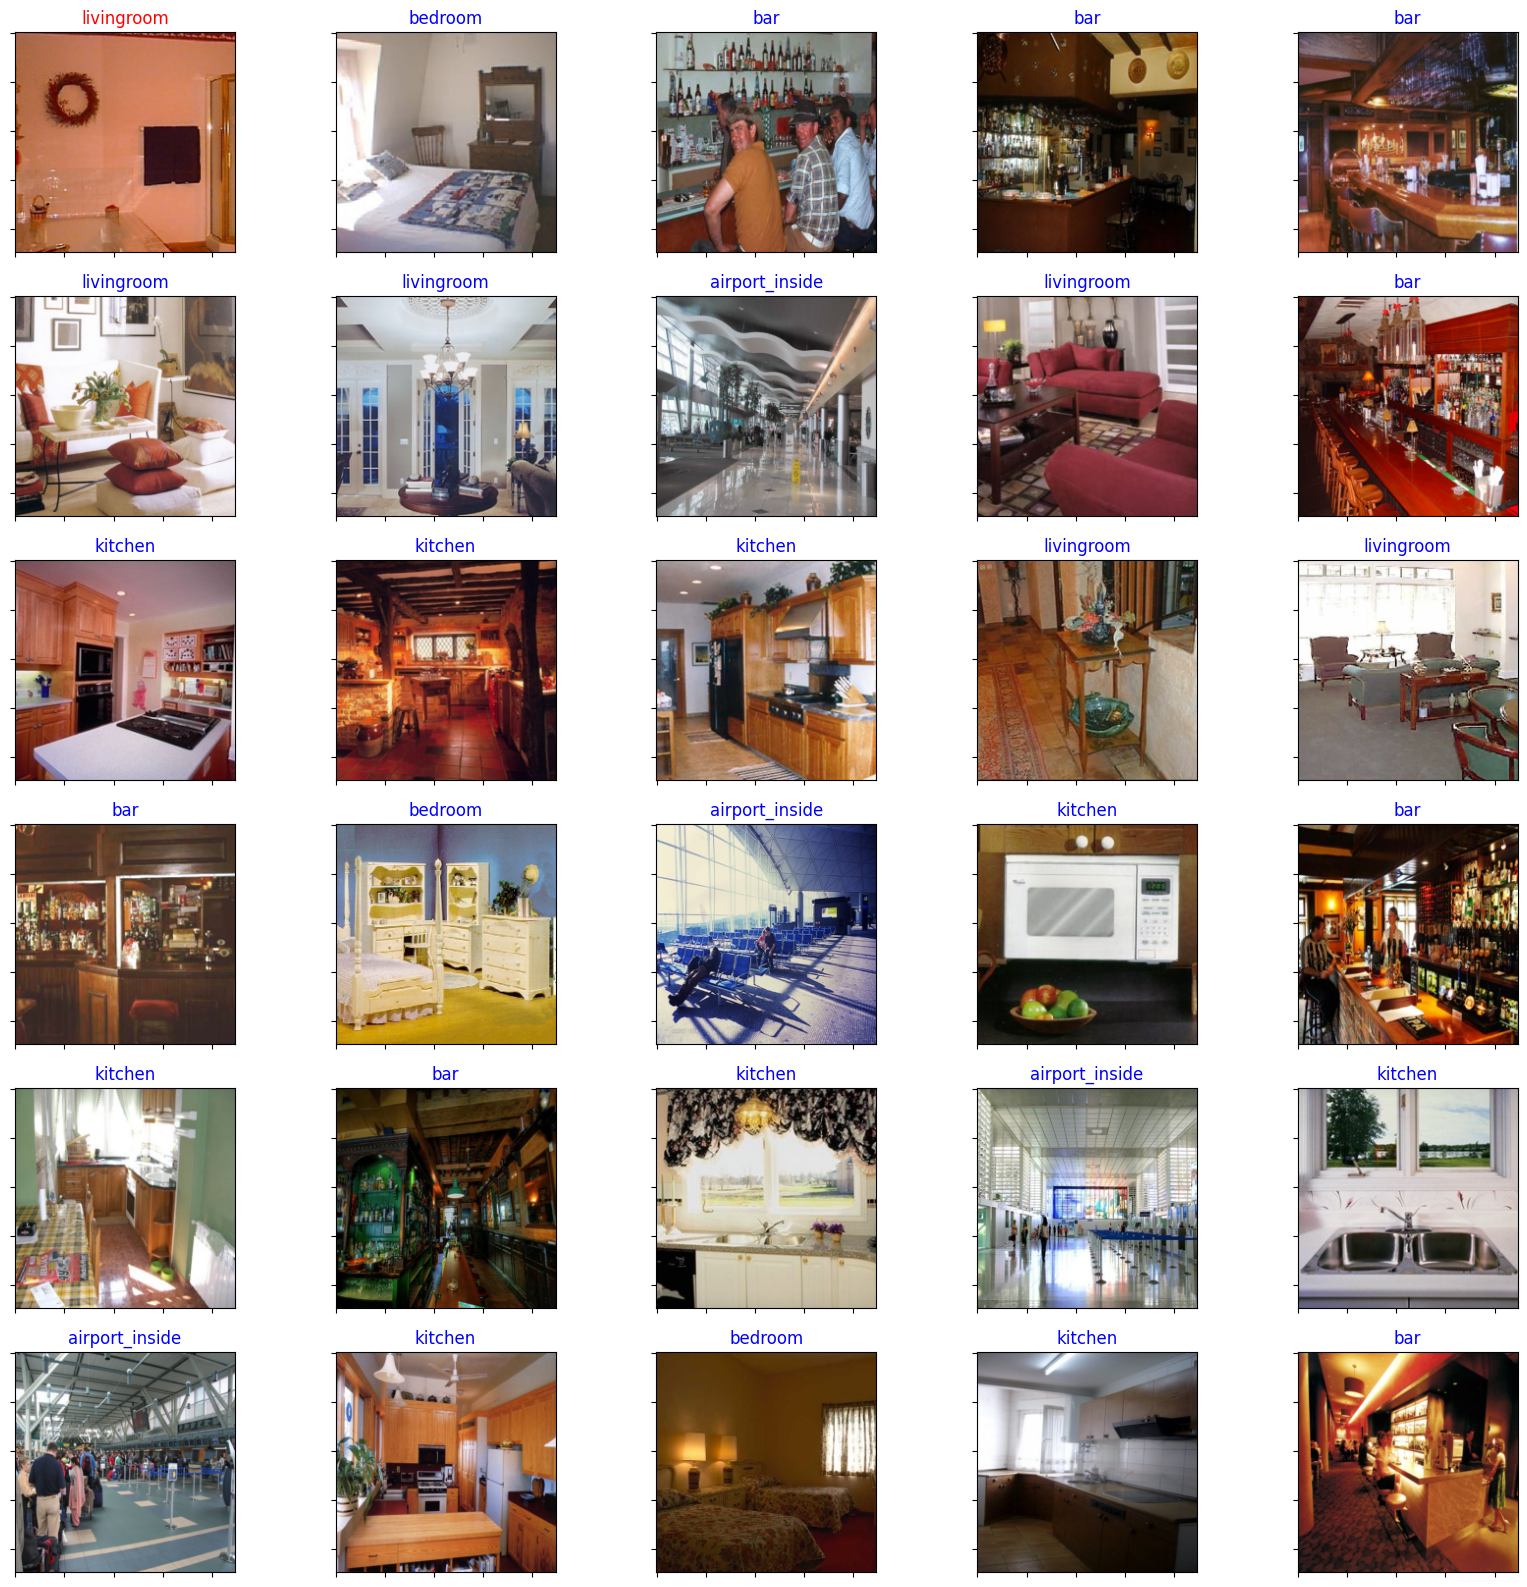

In [74]:
fig, ax = plt.subplots(6, 5, figsize=(20, 20))
i = 0

for row in range(6):
    ax_row = ax[row]
    for column in range(5):
        ax_column = ax_row[column]
        ax_column.imshow(images[i])
        ax_column.set_xticklabels([])
        ax_column.set_yticklabels([])
        col = 'blue' if labels[i] == predicted[i] else 'red'
        ax_column.set_title(predicted[i], color=col)
        i += 1